import pandas as pd


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier



import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

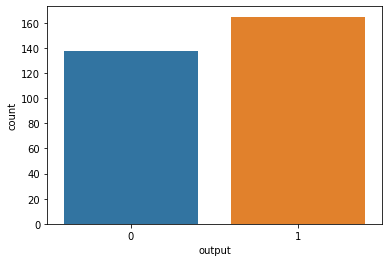

In [4]:
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
sns.countplot(data['output'])
plt.show()

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

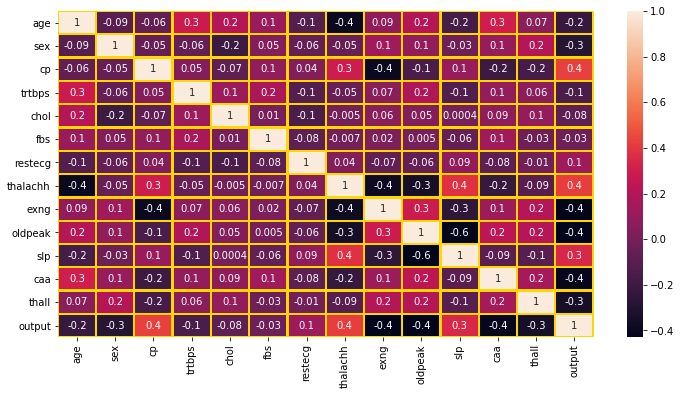

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), robust=True, fmt='0.1g', linewidths=1.3, linecolor='gold',annot=True);

In [13]:
X=data.drop(['output'],axis=1)
y=data.output


In [15]:
normalized_X= Normalize(X)

NameError: name 'Normalize' is not defined

In [16]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [17]:
X_train.shape

(201, 13)

In [18]:
X_val.shape

(101, 13)

## 1.Decision Tree

In [19]:
model_1 = DecisionTreeClassifier(random_state=10)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [20]:
val_predictions = model_1.predict(X_val)
score_model1 = accuracy_score(y_val, val_predictions)
print(score_model1)

0.7029702970297029


In [21]:
report_model1=classification_report(y_val, val_predictions)
print(report_model1)

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        46
           1       0.71      0.76      0.74        55

    accuracy                           0.70       101
   macro avg       0.70      0.70      0.70       101
weighted avg       0.70      0.70      0.70       101



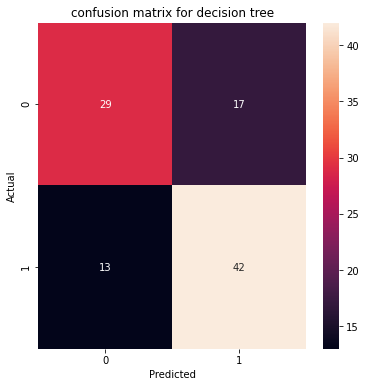

In [23]:
conf_mat1 = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix for decision tree')
plt.show()

## Random Forest

In [24]:
model_2=RandomForestClassifier(random_state=10)
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [25]:
val_predictions_1=model_2.predict(X_val)
score_model2=accuracy_score(y_val, val_predictions_1)
print(score_model2)

0.801980198019802


In [26]:
report_model2=classification_report(y_val, val_predictions_1)
print(report_model2)

              precision    recall  f1-score   support

           0       0.86      0.67      0.76        46
           1       0.77      0.91      0.83        55

    accuracy                           0.80       101
   macro avg       0.82      0.79      0.79       101
weighted avg       0.81      0.80      0.80       101



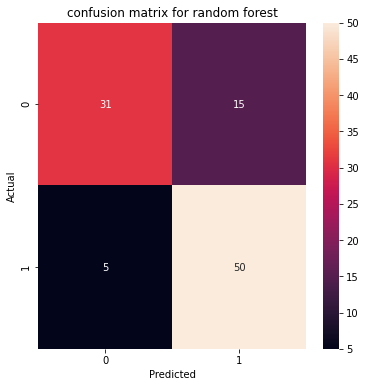

In [27]:
conf_mat2 = confusion_matrix(y_val, val_predictions_1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix for random forest')
plt.show()

## Logistic Regression

In [28]:
model_3= LogisticRegression(random_state=10)
model_3.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [29]:
val_predictions_2=model_3.predict(X_val)
score_model3=accuracy_score(y_val, val_predictions_2)
print(score_model3)

0.801980198019802


In [30]:
report_model3=classification_report(y_val, val_predictions_2)
print(report_model3)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        46
           1       0.78      0.89      0.83        55

    accuracy                           0.80       101
   macro avg       0.81      0.79      0.80       101
weighted avg       0.81      0.80      0.80       101



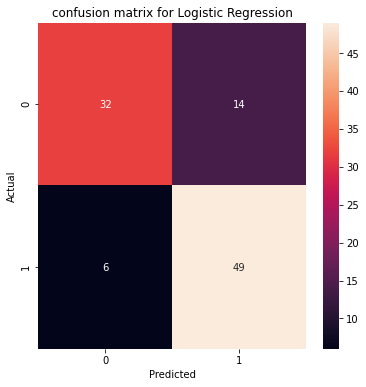

In [31]:
conf_mat3 = confusion_matrix(y_val, val_predictions_2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix for Logistic Regression')
plt.show()

## SVM

In [32]:
model_4=SVC(random_state=10)
model_4.fit(X_train, y_train)

SVC(random_state=10)

0.693069306930693
              precision    recall  f1-score   support

           0       0.74      0.50      0.60        46
           1       0.67      0.85      0.75        55

    accuracy                           0.69       101
   macro avg       0.71      0.68      0.67       101
weighted avg       0.70      0.69      0.68       101



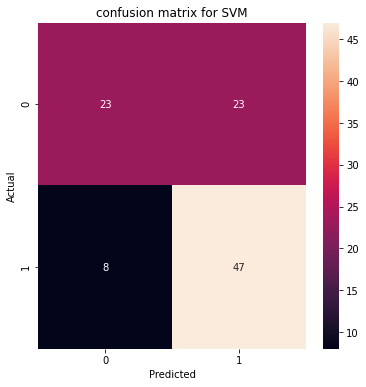

In [33]:
val_predictions_3=model_4.predict(X_val)
score_model4=accuracy_score(y_val, val_predictions_3)
print(score_model4)


report_model4=classification_report(y_val, val_predictions_3)
print(report_model4)


conf_mat4 = confusion_matrix(y_val, val_predictions_3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix for SVM')
plt.show()


Text(0, 0.5, 'Algorithm Scores')

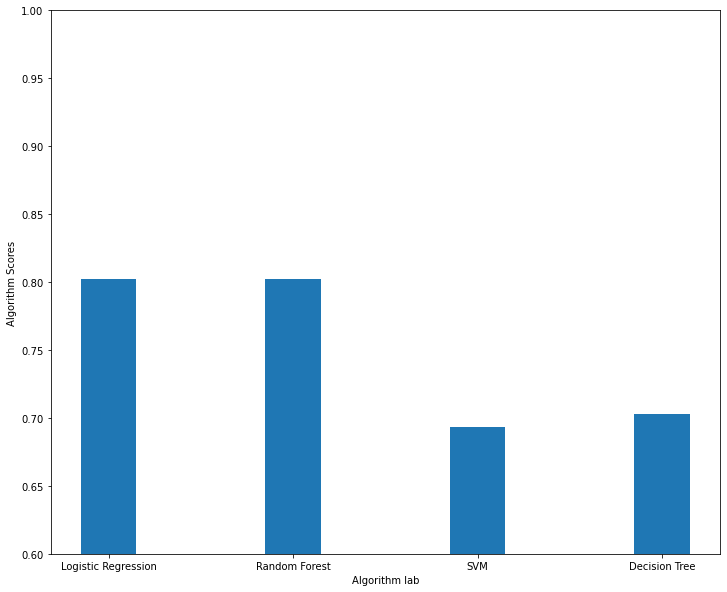

In [34]:
algo_names=['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree']
algo_scores = (score_model3, score_model2, score_model4,score_model1)
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names, algo_scores, width=0.3)
plt.xlabel('Algorithm lab')
plt.ylabel('Algorithm Scores')